In [82]:
'''Every year many students give the GRE exam to get admission in foreign Universities. The
data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating
(out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out
of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no,
1=yes). Admitted is the target variable.
Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.
a) Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if
necessary.
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model.'''

'Every year many students give the GRE exam to get admission in foreign Universities. The\ndata set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating\n(out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out\nof 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no,\n1=yes). Admitted is the target variable.\nData Set: https://www.kaggle.com/mohansacharya/graduate-admissions\nThe counselor of the firm is supposed check whether the student will get an admission or not\nbased on his/her GRE score and Academic Score. So to help the counselor to take appropriate\ndecisions build a machine learning model classifier using Decision tree to predict whether a\nstudent will get admission or not.\na) Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if\nnecessary.\nb) Perform data-preparation (Train-Test Split)\nc) Apply Machine Learning Algorithm\nd) Evaluate Model.'

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [84]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [85]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [87]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [88]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [89]:
data.columns = [c.replace(' ', '') for c in data.columns]

In [90]:
data.loc[data['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
data.loc[data['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [91]:
(data==0).sum()

SerialNo.             0
GREScore              0
TOEFLScore            0
UniversityRating      0
SOP                   0
LOR                   0
CGPA                  0
Research            220
ChanceofAdmit       345
dtype: int64

In [92]:
X = data.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = data['ChanceofAdmit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [93]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [94]:
print("Confusion matrix:\n")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:

[[82  7]
 [ 6 30]]


In [95]:
print("1. Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(y_test, y_pred))

1. Accuracy Score: 0.896
2. Precision Score: 0.8108108108108109
3. Recall Score: 0.8333333333333334
4. f1 Score: 0.821917808219178


In [96]:
y_test

326    0.0
139    0.0
77     0.0
276    1.0
105    0.0
      ... 
125    0.0
453    0.0
381    0.0
143    1.0
266    0.0
Name: ChanceofAdmit, Length: 125, dtype: float64

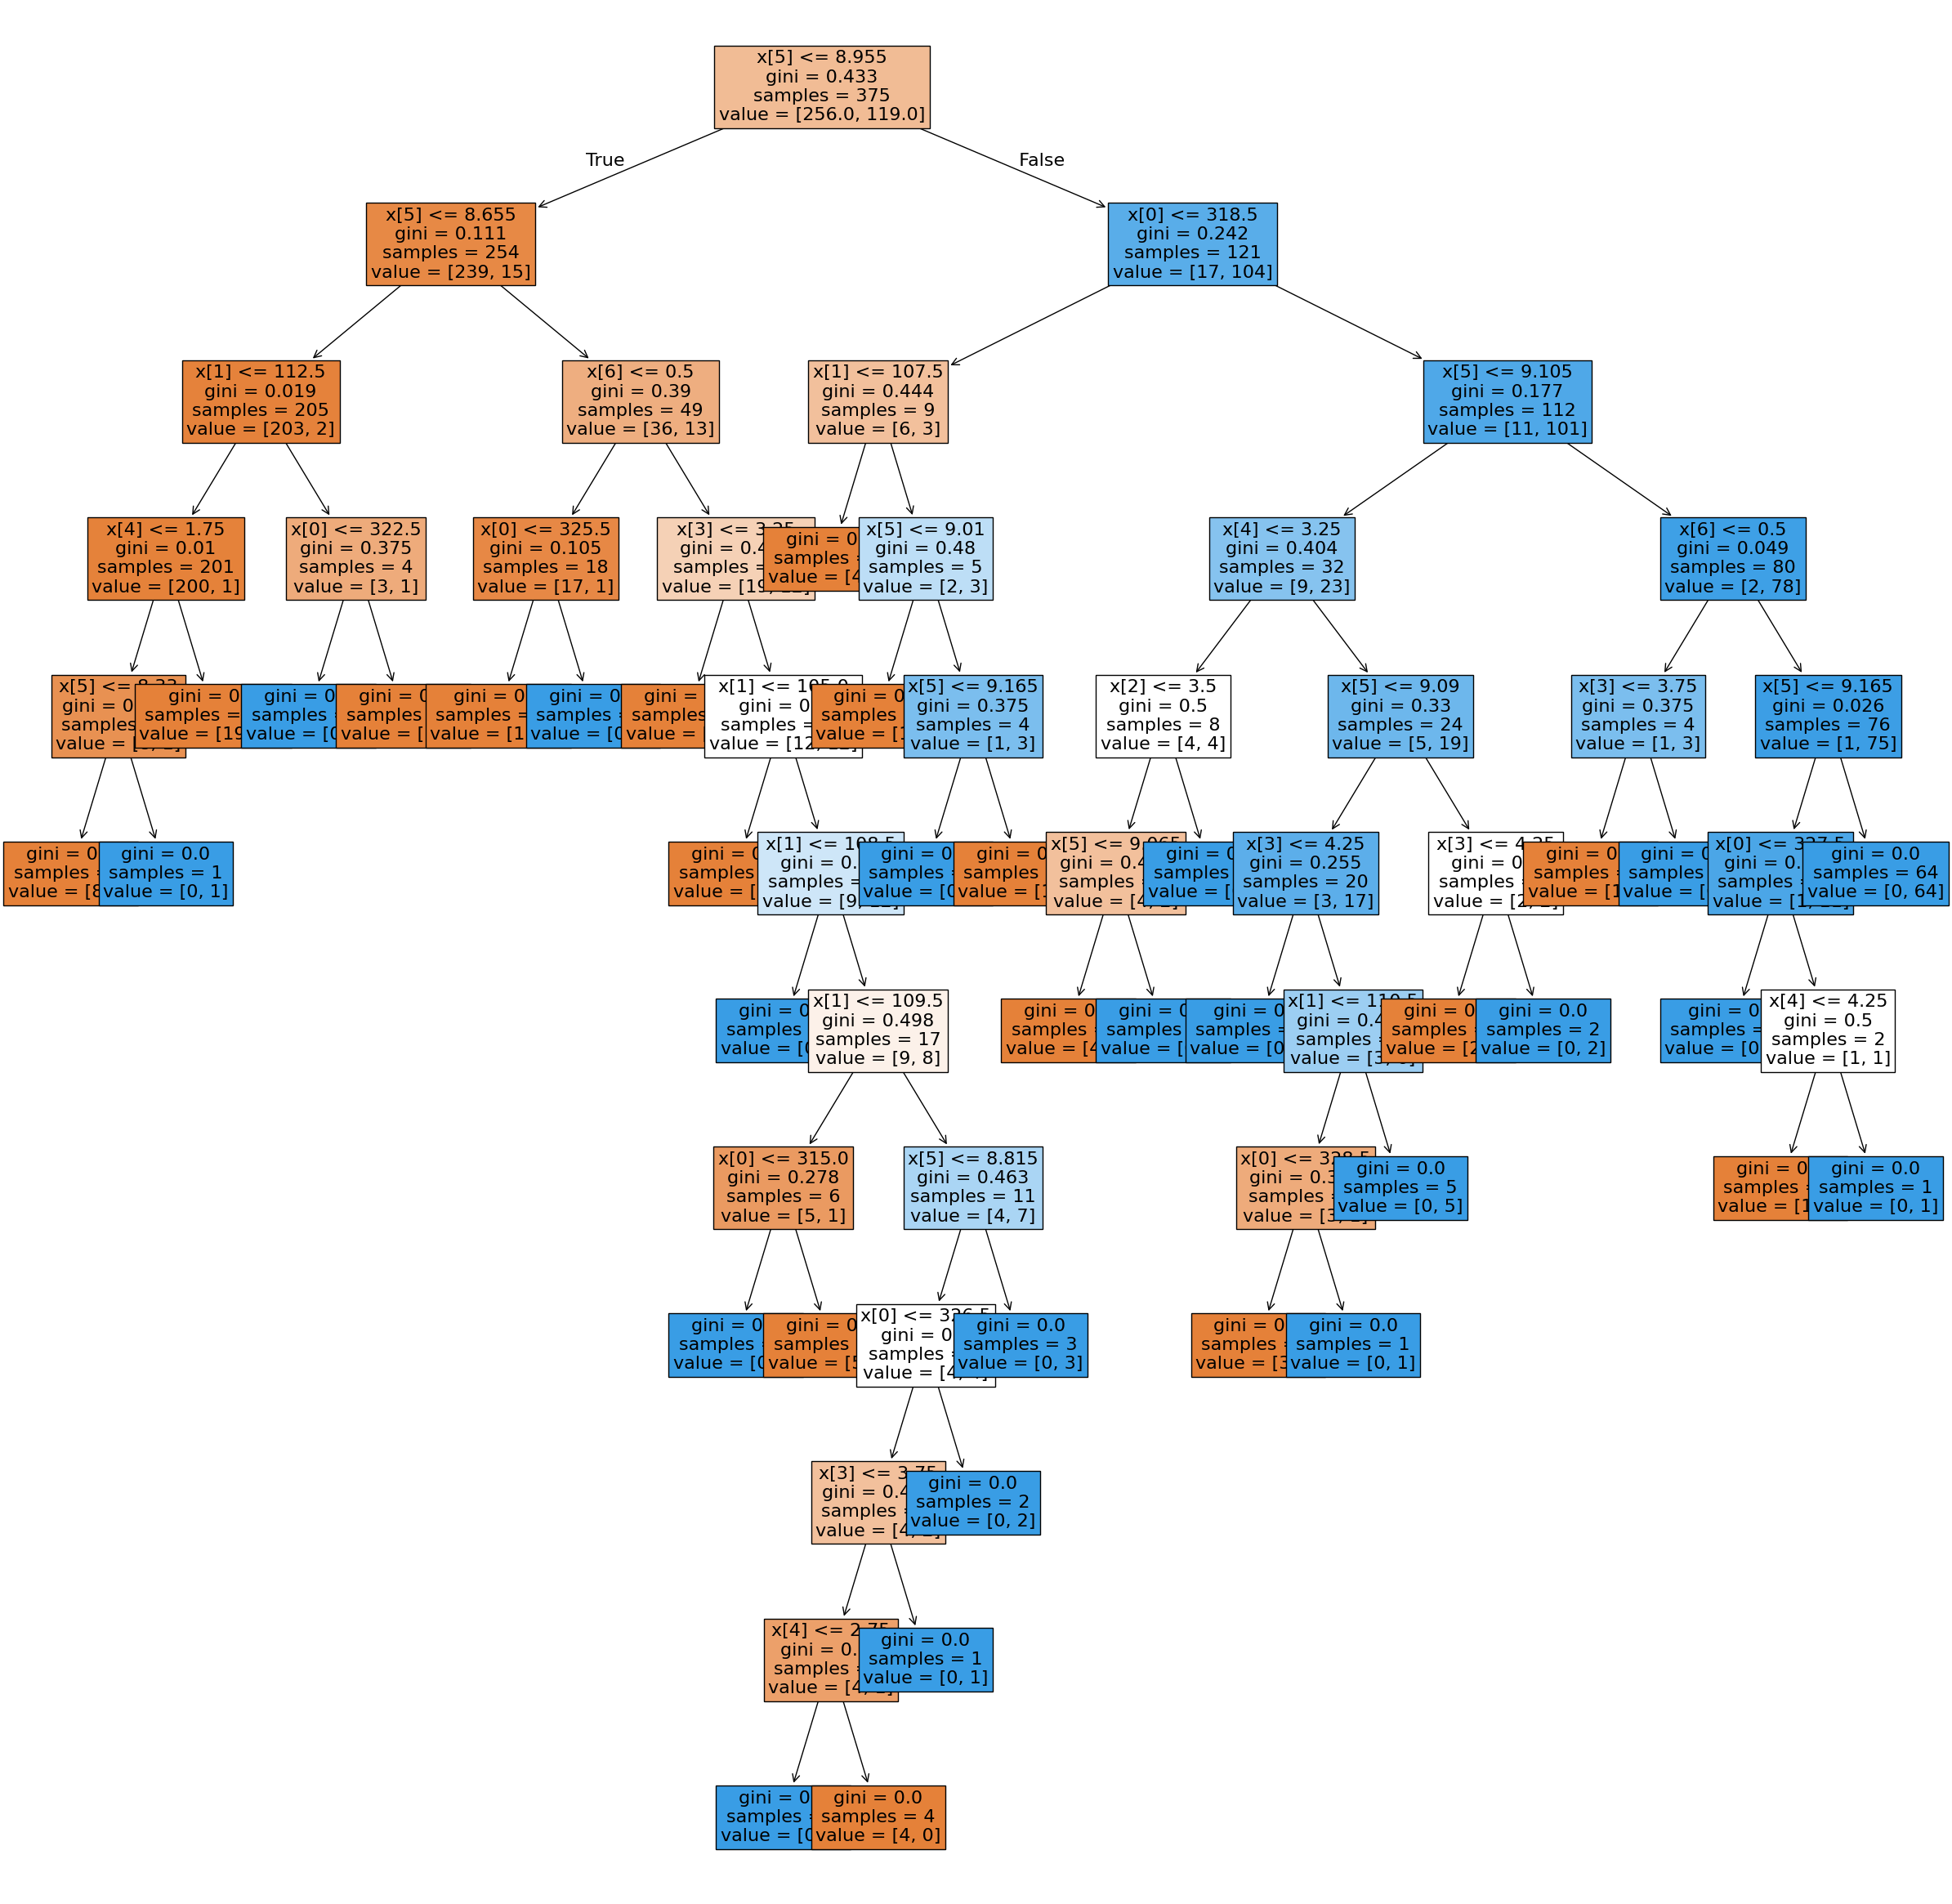

In [97]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=16)
plt.show()

In [98]:
clf.score(X_test,y_test)

0.896